In [11]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'GeneralAviationDashboard_Data_20221208_Public.xlsx'
accidents_df = pd.read_excel(file_path, sheet_name='Accidents')
findings_df = pd.read_excel(file_path, sheet_name='Findings')

# Filtering accidents in Alaska and in the United States (excluding Alaska and Hawaii)
# Also filtering for 'FatalInjuries' > 0 and 'SeriousInjuries' > 0

# Alaska accidents
alaska_accidents = accidents_df[(accidents_df['StateOrRegion'] == 'Alaska') & 
                                ((accidents_df['FatalInjuries'] > 0) | (accidents_df['SeriousInjuries'] > 0))]

# US accidents (excluding Alaska and Hawaii)
us_accidents = accidents_df[(accidents_df['Country'] == 'United States') & 
                            (accidents_df['StateOrRegion'] != 'Alaska') & 
                            (accidents_df['StateOrRegion'] != 'Hawaii') & 
                            ((accidents_df['FatalInjuries'] > 0) | (accidents_df['SeriousInjuries'] > 0))]

# Count of accidents
alaska_accidents_count = len(alaska_accidents)
us_accidents_count = len(us_accidents)

# Merging the accidents data with the findings data based on MKey, for both Alaska and US accidents
alaska_findings = pd.merge(alaska_accidents, findings_df, on='MKey')
us_findings = pd.merge(us_accidents, findings_df, on='MKey')

# Dropping duplicate MKey for each unique Category for both Alaska and US
alaska_unique_categories = alaska_findings.drop_duplicates(subset=['MKey', 'Category'])
us_unique_categories = us_findings.drop_duplicates(subset=['MKey', 'Category'])

# Count of each category for Alaska and US
category_counts_alaska = alaska_unique_categories['Category'].value_counts()
category_counts_us = us_unique_categories['Category'].value_counts()

# Calculating percentages
category_percentage_alaska = (category_counts_alaska / alaska_accidents_count) * 100
category_percentage_us = (category_counts_us / us_accidents_count) * 100

# Creating a DataFrame for plotting
categories_comparison_df = pd.DataFrame({'Alaska': category_percentage_alaska, 'US': category_percentage_us}).fillna(0)

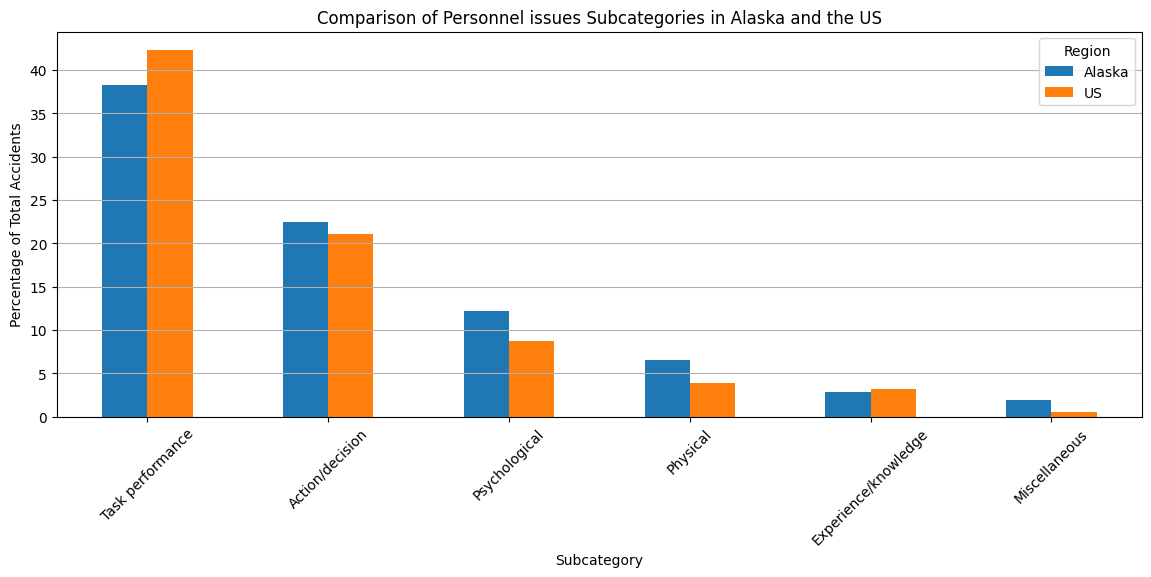

In [19]:
def plot_subcategory_comparison(category_name, alaska_data, us_data, alaska_total_accidents, us_total_accidents):
    """
    Plots a comparison of subcategories within a given category for Alaska and US accidents.

    :param category_name: The name of the category to analyze.
    :param alaska_data: DataFrame containing Alaska accidents with findings.
    :param us_data: DataFrame containing US accidents with findings.
    :param alaska_total_accidents: Total number of accidents in Alaska.
    :param us_total_accidents: Total number of accidents in the US.
    """
    # Filtering subcategories for the given category for both Alaska and US
    alaska_subcategories = alaska_data[alaska_data['Category'] == category_name]
    us_subcategories = us_data[us_data['Category'] == category_name]

    # Dropping duplicates to avoid double counting
    alaska_subcategories_unique = alaska_subcategories.drop_duplicates(subset=['MKey', 'Subcategory'])
    us_subcategories_unique = us_subcategories.drop_duplicates(subset=['MKey', 'Subcategory'])

    # Count of each subcategory
    subcategory_counts_alaska = alaska_subcategories_unique['Subcategory'].value_counts()
    subcategory_counts_us = us_subcategories_unique['Subcategory'].value_counts()

    # Calculating percentages
    subcategory_percentage_alaska = (subcategory_counts_alaska / alaska_total_accidents) * 100
    subcategory_percentage_us = (subcategory_counts_us / us_total_accidents) * 100

    # Creating a DataFrame for plotting
    subcategories_comparison_df = pd.DataFrame({'Alaska': subcategory_percentage_alaska, 'US': subcategory_percentage_us}).fillna(0)

    # Plotting the data as side by side bars on a bar chart
    subcategories_comparison_df.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Comparison of {category_name} Subcategories in Alaska and the US')
    plt.xlabel('Subcategory')
    plt.ylabel('Percentage of Total Accidents')
    plt.xticks(rotation=45)
    plt.legend(title='Region')
    plt.grid(axis='y')

    plt.show()

# Example usage of the function
plot_subcategory_comparison("Personnel issues", alaska_unique_categories, us_unique_categories, alaska_accidents_count, us_accidents_count)

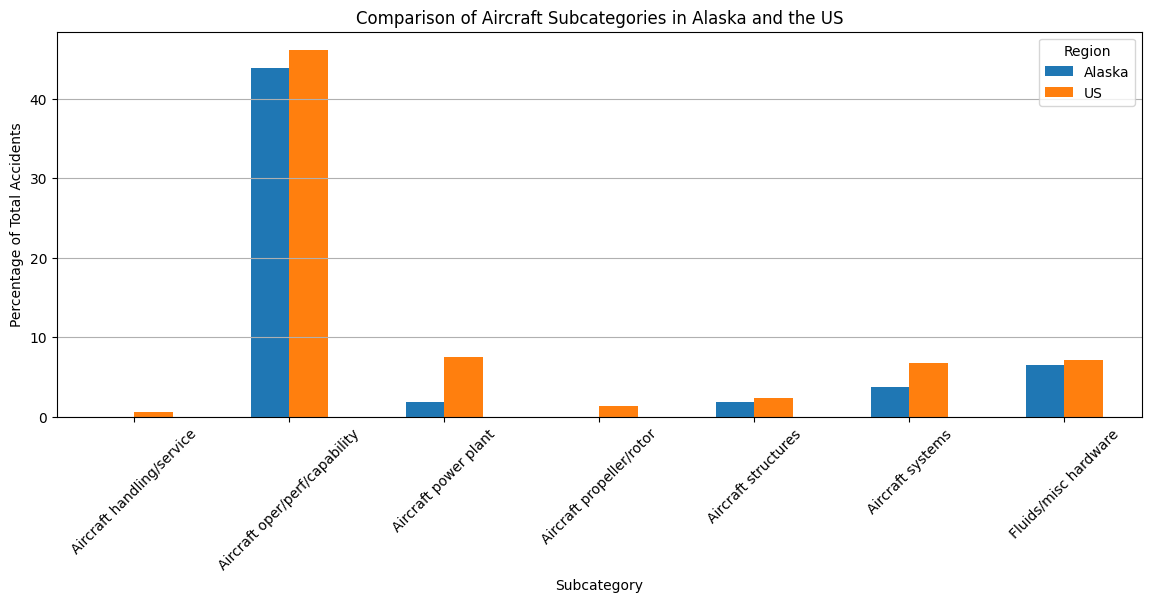

In [20]:
plot_subcategory_comparison('Aircraft', alaska_unique_categories, us_unique_categories, alaska_accidents_count, us_accidents_count)

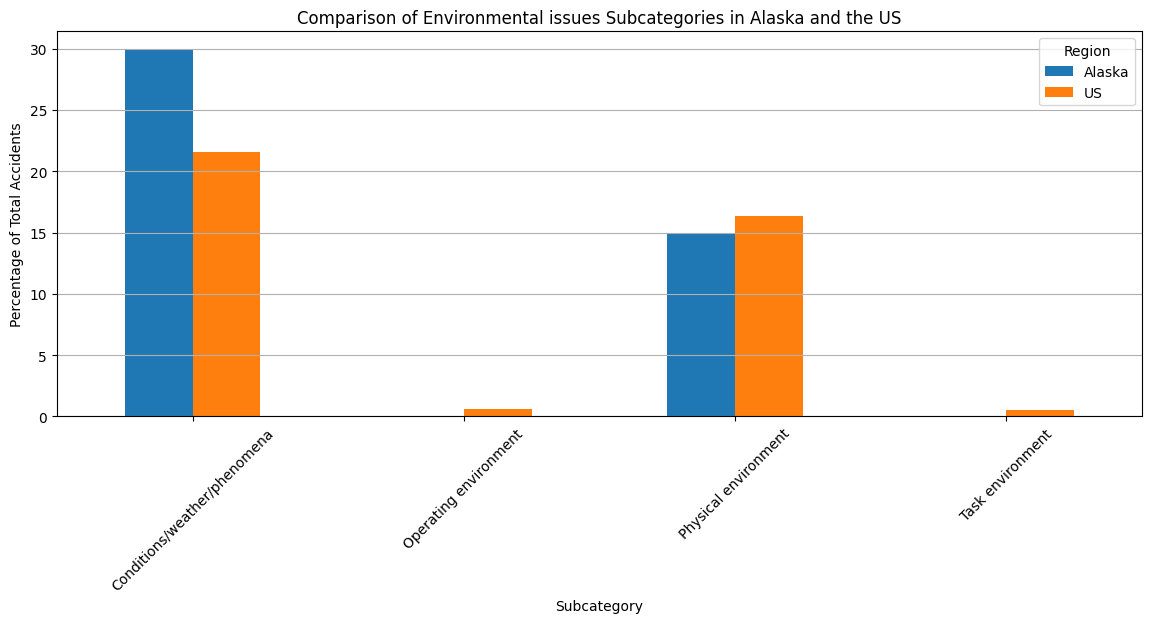

In [21]:
plot_subcategory_comparison('Environmental issues', alaska_unique_categories, us_unique_categories, alaska_accidents_count, us_accidents_count)